In [1]:
#Important Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\bibhu\Desktop\Python\rcommended System\spam detection\spam.csv",encoding='latin1')

In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df=df[['v1','v2']] # droping the last 3 columns
df.columns=['Target','Text']

In [7]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [9]:
df['Target']=le.fit_transform(df['Target'])

In [10]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [11]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')

# 2. EDA

In [15]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

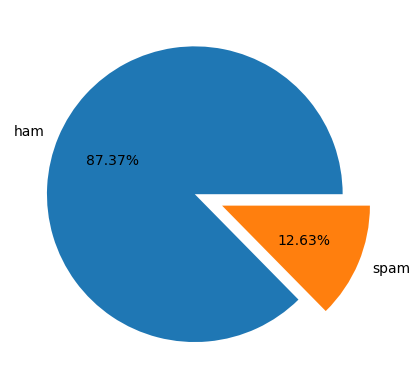

In [16]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%.2f%%',explode=[0,.2])
plt.show()

### Data is imbalance

In [17]:
import nltk

In [18]:
df['num_character']=df['Text'].apply(len)

In [19]:
df['num_words']=df['Text'].apply(lambda x: len(str(x).split()))

In [20]:
df['num_sentences']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [22]:
df[['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.965564
std,58.236293,11.068488,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,38.000000


In [23]:
#analysing ham
df[df['Target']==0][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.820195
std,56.358207,11.116240,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [24]:
#analysing spam
df[df['Target']==1][['num_character','num_words','num_sentences']].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.970904
std,30.137753,5.967672,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


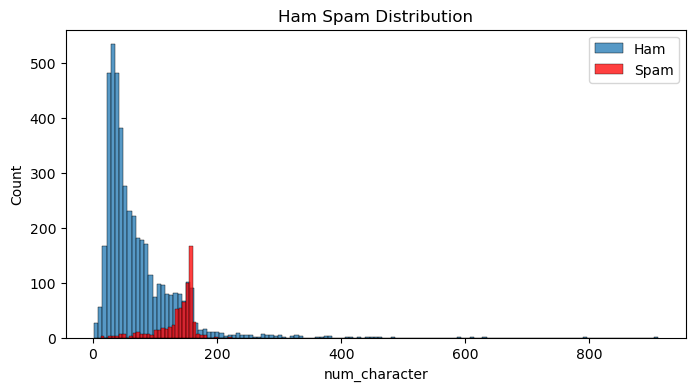

In [25]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Target']==0]['num_character'],label='Ham')
sns.histplot(df[df['Target']==1]['num_character'],color='red',label='Spam')
plt.title('Ham Spam Distribution')
plt.legend()
plt.show()

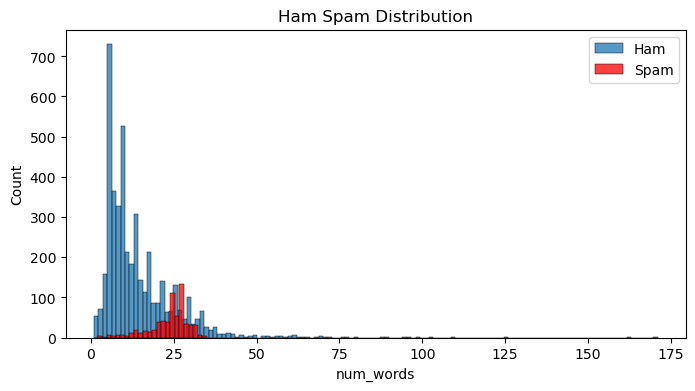

In [26]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Target']==0]['num_words'],label='Ham')
sns.histplot(df[df['Target']==1]['num_words'],color='red',label='Spam')
plt.title('Ham Spam Distribution')
plt.legend()
plt.show()

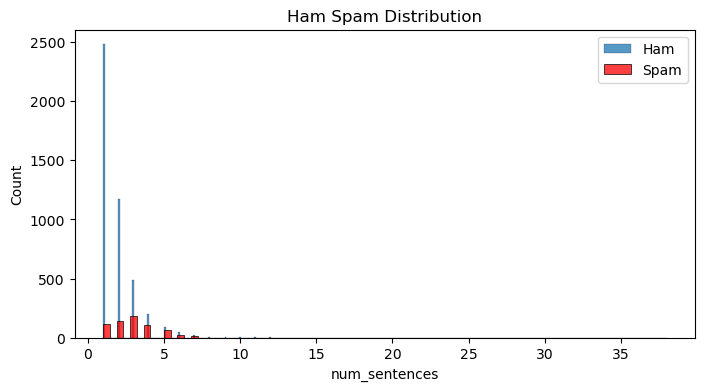

In [27]:
plt.figure(figsize=(8,4))
sns.histplot(df[df['Target']==0]['num_sentences'],label='Ham')
sns.histplot(df[df['Target']==1]['num_sentences'],color='red',label='Spam')
plt.title('Ham Spam Distribution')
plt.legend()
plt.show()

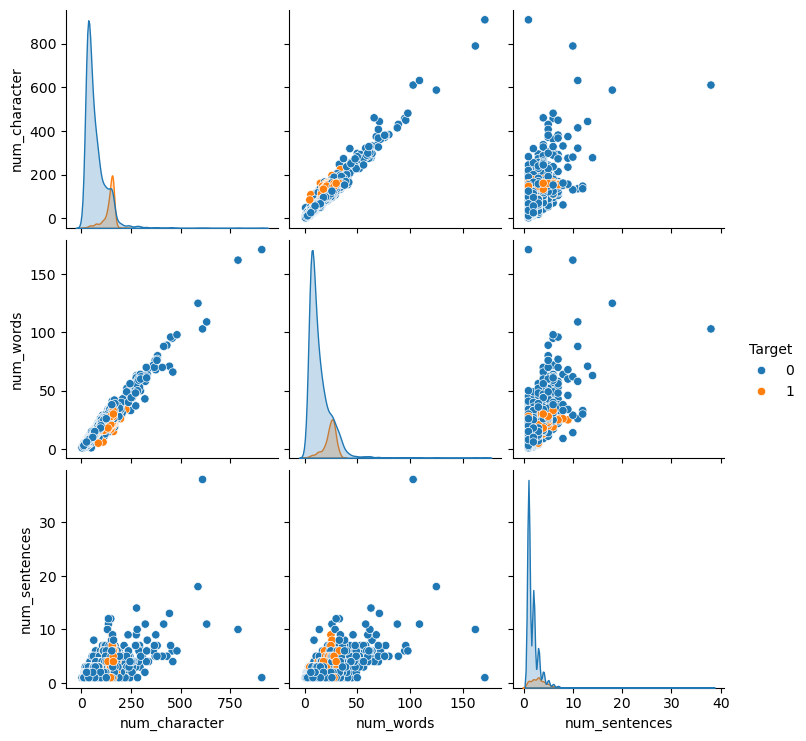

In [28]:
sns.pairplot(df,hue='Target')

<Axes: >

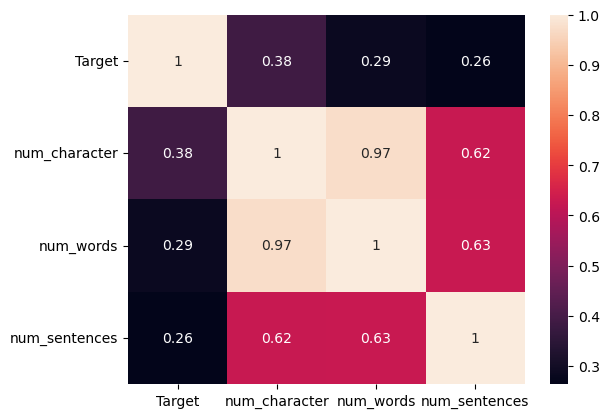

In [29]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

For further model building, we will use 'num_character' column as it has highest corelation with Target variable

# 3. Data Preprocessing

In [30]:
# transformrming text column
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer


def transform_text(text):
    text=text.lower() # converting to lower case
    text=nltk.word_tokenize(text) # tokanizing the text to words

    #removing the special character
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y=[]
    
    #removing punctuation and stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y.copy()
    y=[]
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)
            

In [31]:
df['Text_tranformed']=df['Text'].apply(transform_text)

In [32]:
df.head()

,Target,Text,num_character,num_words,num_sentences,Text_tranformed
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

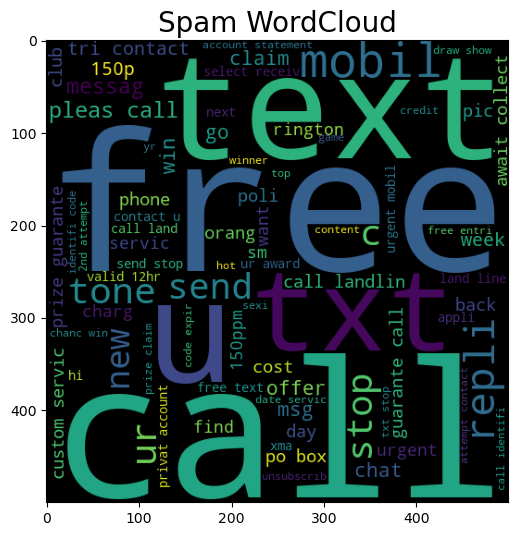

In [34]:
spam_wc=wc.generate(df[df['Target']==1]['Text_tranformed'].str.cat(sep=' '))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Spam WordCloud',fontdict={'fontsize':20})
plt.show()

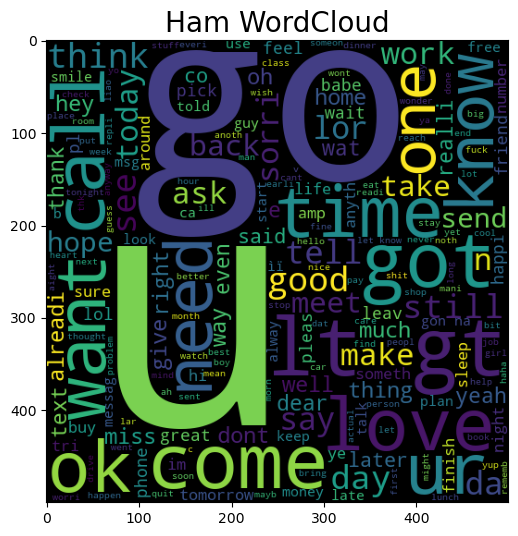

In [35]:
ham_wc=wc.generate(df[df['Target']==0]['Text_tranformed'].str.cat(sep=' '))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Ham WordCloud',fontdict={'fontsize':20})
plt.show()

In [36]:
# top 30 words in spam

word_dic={}
for msg in df[df['Target']==1]['Text_tranformed'].tolist():
    for word in msg.split():
        if word in word_dic:
            word_dic[word]+=1
        else:
            word_dic[word]=1

top_30=sorted(word_dic.items(),key=lambda x:x[1],reverse=True)[:30]


In [37]:
top_30_spam_word=pd.DataFrame(top_30)
top_30_spam_word.columns=['words','counts']
top_30_spam_word.head()

,words,counts
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


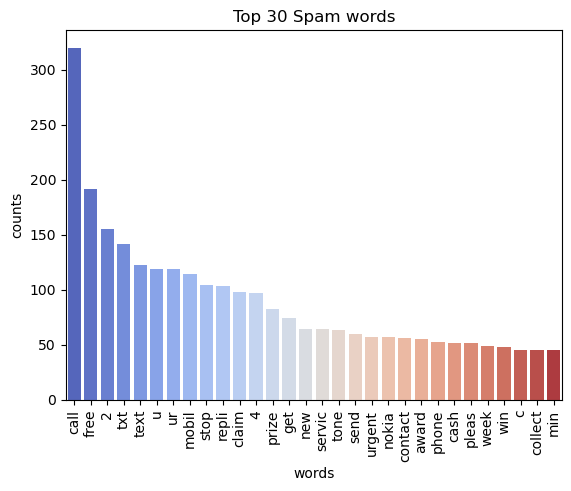

In [38]:
sns.barplot(data=top_30_spam_word,x='words',y='counts',palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Top 30 Spam words')
plt.show()

In [39]:

word_dic={}
for msg in df[df['Target']==0]['Text_tranformed'].tolist():
    for word in msg.split():
        if word in word_dic:
            word_dic[word]+=1
        else:
            word_dic[word]=1

top_30=sorted(word_dic.items(),key=lambda x:x[1],reverse=True)[:30]

top_30_ham_word=pd.DataFrame(top_30)
top_30_ham_word.columns=['words','counts']


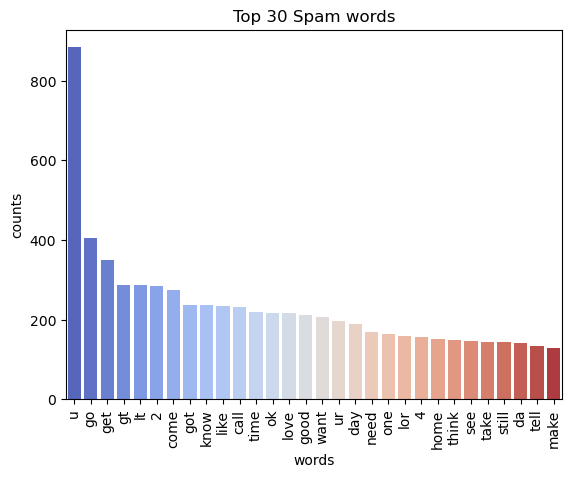

In [40]:
sns.barplot(data=top_30_ham_word,x='words',y='counts',palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Top 30 Spam words')
plt.show()

# Model Building

In [140]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [141]:
# X=cv.fit_transform(df['Text_tranformed']).toarray()
X=tfidf.fit_transform(df['Text_tranformed']).toarray()

In [142]:
y=df['Target']

In [143]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=2)

In [144]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB

In [145]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [146]:
gnb.fit(xtrain,ytrain)
bnb.fit(xtrain,ytrain)
mnb.fit(xtrain,ytrain)

MultinomialNB()

In [96]:
from sklearn.metrics import *

In [97]:
ypred1=gnb.predict(xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(classification_report(ytest,ypred1))
print(precision_score(ytest,ypred1))


0.8762088974854932
[[793 103]
 [ 25 113]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034

0.5231481481481481


In [98]:
ypred2=bnb.predict(xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(classification_report(ytest,ypred2))
print(precision_score(ytest,ypred2))


0.9700193423597679
[[893   3]
 [ 28 110]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

0.9734513274336283


In [147]:
ypred3=mnb.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(classification_report(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.9593810444874274
[[896   0]
 [ 42  96]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

1.0


 As the precision is high in MultinomialNB -->tfidf, so we will use MultinomialNB

In [100]:
# trying with other ML algorithem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [53]:
# pip install xgboost

In [101]:
svc=SVC(kernel='sigmoid')
log=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
knc=KNeighborsClassifier()
rfc=RandomForestClassifier(random_state=42,max_depth=5)
adc=AdaBoostClassifier(random_state=42)
bc=BaggingClassifier(random_state=42)
gbc=GradientBoostingClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)

In [102]:
clfs={
    'SVC':svc,
    'LOG':log,
    'MNB':mnb,
    'DTC':dtc,
    'KNC':knc,
    'RFC':rfc,
    'ADC':adc,
    'BC':bc,
    'GBC':gbc,
    'XGB':xgb
}

In [103]:

def train_classifier(clf,xtrain,xtest,ytrain,ytest):
    clf.fit(xtrain,ytrain)
    ypred=clf.predict(xtest)
    accuracy=accuracy_score(ytest,ypred)
    precision=precision_score(ytest,ypred)

    return accuracy,precision

In [104]:
accuracy_scores=[]
precision_scores=[]

for name,clf in clfs.items():
    crt_accuracy,crt_precision=train_classifier(clf,xtrain,xtest,ytrain,ytest)

    print("For ",name)
    print("Accuracy - ",crt_accuracy)
    print("Precision - ",crt_precision)
    
    accuracy_scores.append(crt_accuracy)
    precision_scores.append(crt_precision)
    print(name)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
SVC
For  LOG
Accuracy -  0.9477756286266924
Precision -  0.9883720930232558
LOG
For  MNB
Accuracy -  0.9593810444874274
Precision -  1.0
MNB
For  DTC
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
DTC
For  KNC
Accuracy -  0.9003868471953579
Precision -  1.0
KNC
For  RFC
Accuracy -  0.8665377176015474
Precision -  0.0
RFC
For  ADC
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
ADC
For  BC
Accuracy -  0.9613152804642167
Precision -  0.8769230769230769
BC
For  GBC
Accuracy -  0.9613152804642167
Precision -  0.9224137931034483
GBC
For  XGB
Accuracy -  0.9748549323017408
Precision -  0.9375
XGB


In [127]:
Model_preformance_df=pd.DataFrame({'Model':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
Model_preformance_df=Model_preformance_df.sort_values(by='Precision',ascending=False)

In [131]:
Model_preformance_df.head()

,Accuracy,Precision
Model,,
MNB,0.959381,1.000000
KNC,0.900387,1.000000
LOG,0.947776,0.988372
SVC,0.972921,0.974138
ADC,0.961315,0.945455


In [128]:
Model_preformance_df=Model_preformance_df.set_index('Model')

<Axes: xlabel='Model'>

<Figure size 1400x600 with 0 Axes>

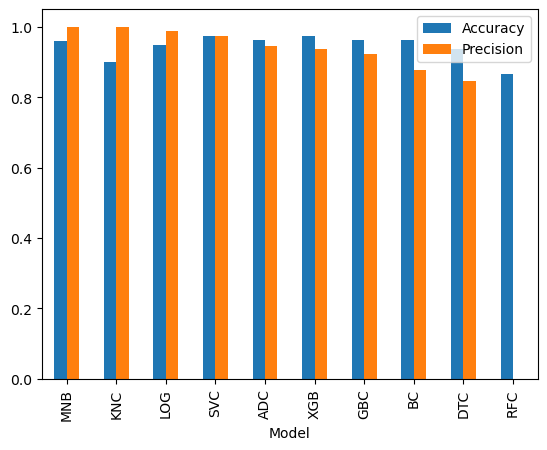

In [129]:
plt.figure(figsize=(14,6))
Model_preformance_df.plot.bar()

MultinomialNB performes the best among all the models( Accuracy: 0.959381	Precision: 1.000000)		0)

In [132]:
# Imporving the models
# 1. adding one hyperparameter in Tfidf max_features=3000

In [138]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# cv=CountVectorizer()
# tfidf=TfidfVectorizer(max_features=3000)

# X=tfidf.fit_transform(df['Text_tranformed']).toarray()
# y=df['Target']

# xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=2)

# accuracy_scores=[]
# precision_scores=[]

# for name,clf in clfs.items():
#     crt_accuracy,crt_precision=train_classifier(clf,xtrain,xtest,ytrain,ytest)

#     print("For ",name)
#     print("Accuracy - ",crt_accuracy)
#     print("Precision - ",crt_precision)
    
#     accuracy_scores.append(crt_accuracy)
#     precision_scores.append(crt_precision)
#     print(name)

# Model_preformance_df['Accuracy_max_feature_3000']=accuracy_scores
# Model_preformance_df['Precision_max_feature_3000']=precision_scores
# Model_preformance_df=Model_preformance_df.sort_values(by='Precision',ascending=False)

In [139]:
# Model_preformance_df.head()

In [155]:
#final rum of the model deployment prep

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()

X=tfidf.fit_transform(df['Text_tranformed']).toarray()
y=df['Target']

xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.2,random_state=2)

mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)

ypred3=mnb.predict(xtest)
print(accuracy_score(ytest,ypred3))
print(confusion_matrix(ytest,ypred3))
print(classification_report(ytest,ypred3))
print(precision_score(ytest,ypred3))

0.9593810444874274
[[896   0]
 [ 42  96]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

1.0


In [156]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))


In [164]:
#prediction
str="URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18"

x=transform_text(str)
xtrs=tfidf.transform([x])
prediction=mnb.predict(xtrs)[0]

if prediction==1:
    print('SPAM')
else:
    print('Not SPAM')

prediction

SPAM


1